# 🚢 타이타닉 생존 예측 프로젝트

## 🎯 프로젝트 목표
**타이타닉호 승객 데이터를 분석하여 생존 여부를 예측하는 모델 구축**

### 📚 배울 내용
1. **실제 데이터 탐색 (EDA)** - 데이터 스토리텔링 ✅
   - 기본 통계 분석 (평균, 분포, 결측치 확인)
   - 시각화를 통한 패턴 발견 (파이차트, 막대그래프, 히트맵)
   - 교차 분석 (성별×등급, 나이대×생존율 등)
   - 핵심 인사이트 도출 ("여성이 4배 더 안전", "1등석이 2.6배 안전")

2. **데이터 전처리** - 결측치, 이상치 처리
   - 결측치 처리 (age 평균값, embarked 최빈값으로 채우기)
   - 카테고리 인코딩 (male/female → 0/1, 등급명 → 숫자)
   - 불필요한 컬럼 제거 (deck 77% 결측치라 삭제)
   - 데이터 타입 최적화

3. **피처 엔지니어링** - 새로운 특성 창조
   - 가족 크기 계산 (sibsp + parch + 1)
   - 혼자 여행 여부 (is_alone: True/False)
   - 나이 그룹화 (어린이/청년/중년/노년)
   - 요금 구간화 (저가/중가/고가)

4. **모델 비교** - 여러 알고리즘 성능 비교
   - Decision Tree vs Random Forest vs Logistic Regression
   - 정확도, 정밀도, 재현율, F1-Score 비교
   - 혼동행렬로 실수 유형 분석
   - 최적 모델 선택 및 성능 해석

5. **비즈니스 인사이트** - 데이터에서 스토리 찾기
   - 생존 요인 중요도 순위 (성별 > 등급 > 나이 > 가족크기)
   - 실무 적용 가능한 결론 도출
   - **개인 맞춤 생존 예측기** 구현
   - "당신이 타이타닉에 탔다면?" 시뮬레이션

### 🔍 **데이터셋 정보**
- **목표**: 승객의 생존 여부 예측 (이진 분류)
- **특성들**: 나이, 성별, 객실등급, 승선지, 가족수 등
- **크기**: 약 900명의 승객 데이터

---


## 🛠️ 라이브러리 준비


In [1]:
# 🛠️ 필수 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 데이터 로드용만
import warnings
warnings.filterwarnings('ignore')  # 경고 메시지 숨기기

# 🎨 한글 폰트 설정 (에러 방지)
try:
    plt.rcParams['font.family'] = ['Apple SD Gothic Neo', 'Nanum Gothic', 'AppleGothic']
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 한글 폰트 설정 완료!")
except:
    print("⚠️ 한글 폰트 설정 실패, 기본 폰트 사용")

# 📊 그래프 스타일 설정
plt.style.use('default')  # 기본 matplotlib 스타일
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("📚 라이브러리 준비 완료!")
print("🎨 matplotlib 스타일 적용 완료!")
print("📦 seaborn: 데이터 로드 전용")
print("🚢 타이타닉 데이터 분석 준비 끝!")


✅ 한글 폰트 설정 완료!
📚 라이브러리 준비 완료!
🎨 matplotlib 스타일 적용 완료!
📦 seaborn: 데이터 로드 전용
🚢 타이타닉 데이터 분석 준비 끝!


## 📁 Step 1: 데이터 로드

타이타닉 데이터셋은 seaborn에 내장되어 있어서 쉽게 불러올 수 있어요!


In [2]:
# 🚢 타이타닉 데이터 로드 (seaborn 내장 데이터 - 안정적!)
try:
    titanic = sns.load_dataset('titanic')
    print("✅ 타이타닉 데이터 로드 성공!")
    print(f"📊 데이터 크기: {titanic.shape[0]}명의 승객, {titanic.shape[1]}개의 특성")
    
    print("\n📋 데이터 미리보기:")
    print("="*50)
    print(titanic.head())
    
    print("\n📊 컬럼 정보:")
    print("="*30)
    print(f"📝 컬럼들: {list(titanic.columns)}")
    
    print("\n📊 데이터 타입:")
    print("="*30)
    print(titanic.dtypes)
    
except Exception as e:
    print(f"❌ 데이터 로드 실패: {e}")
    print("💡 인터넷 연결을 확인하세요!")


✅ 타이타닉 데이터 로드 성공!
📊 데이터 크기: 891명의 승객, 15개의 특성

📋 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

📊 컬럼 정보:
📝 컬럼들: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone

## 🔍 Step 2: 기본 데이터 탐색

**"데이터가 들려주는 타이타닉 이야기를 들어보자!"** 📖


In [3]:
# 📊 기본 통계 정보
print("📊 타이타닉 데이터 통계 요약:")
print("="*60)
print(titanic.describe())

print("\n🔍 결측치 확인:")
print("="*30)
missing_data = titanic.isnull().sum()
missing_percent = (missing_data / len(titanic)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent.round(2)
})
print("결측치가 있는 컬럼들:")
print(missing_df[missing_df['Missing_Count'] > 0])

print("\n💡 핵심 발견:")
print(f"   🎯 전체 생존율: {titanic['survived'].mean()*100:.1f}%")
print(f"   👥 총 승객 수: {len(titanic)}명")
print(f"   ✅ 생존자: {titanic['survived'].sum()}명")
print(f"   ❌ 사망자: {len(titanic) - titanic['survived'].sum()}명")

# 📊 생존자와 사망자 비율
survival_counts = titanic['survived'].value_counts()
print(f"\n📈 생존 통계:")
print(f"   사망: {survival_counts[0]}명 ({survival_counts[0]/len(titanic)*100:.1f}%)")
print(f"   생존: {survival_counts[1]}명 ({survival_counts[1]/len(titanic)*100:.1f}%)")


📊 타이타닉 데이터 통계 요약:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

🔍 결측치 확인:
결측치가 있는 컬럼들:
             Missing_Count  Missing_Percent
age                    177            19.87
embarked                 2             0.22
deck                   688            77.22
embark_town              2             0.22

💡 핵심 발견:
   🎯 전체 생존율: 38.4%
   👥 총 

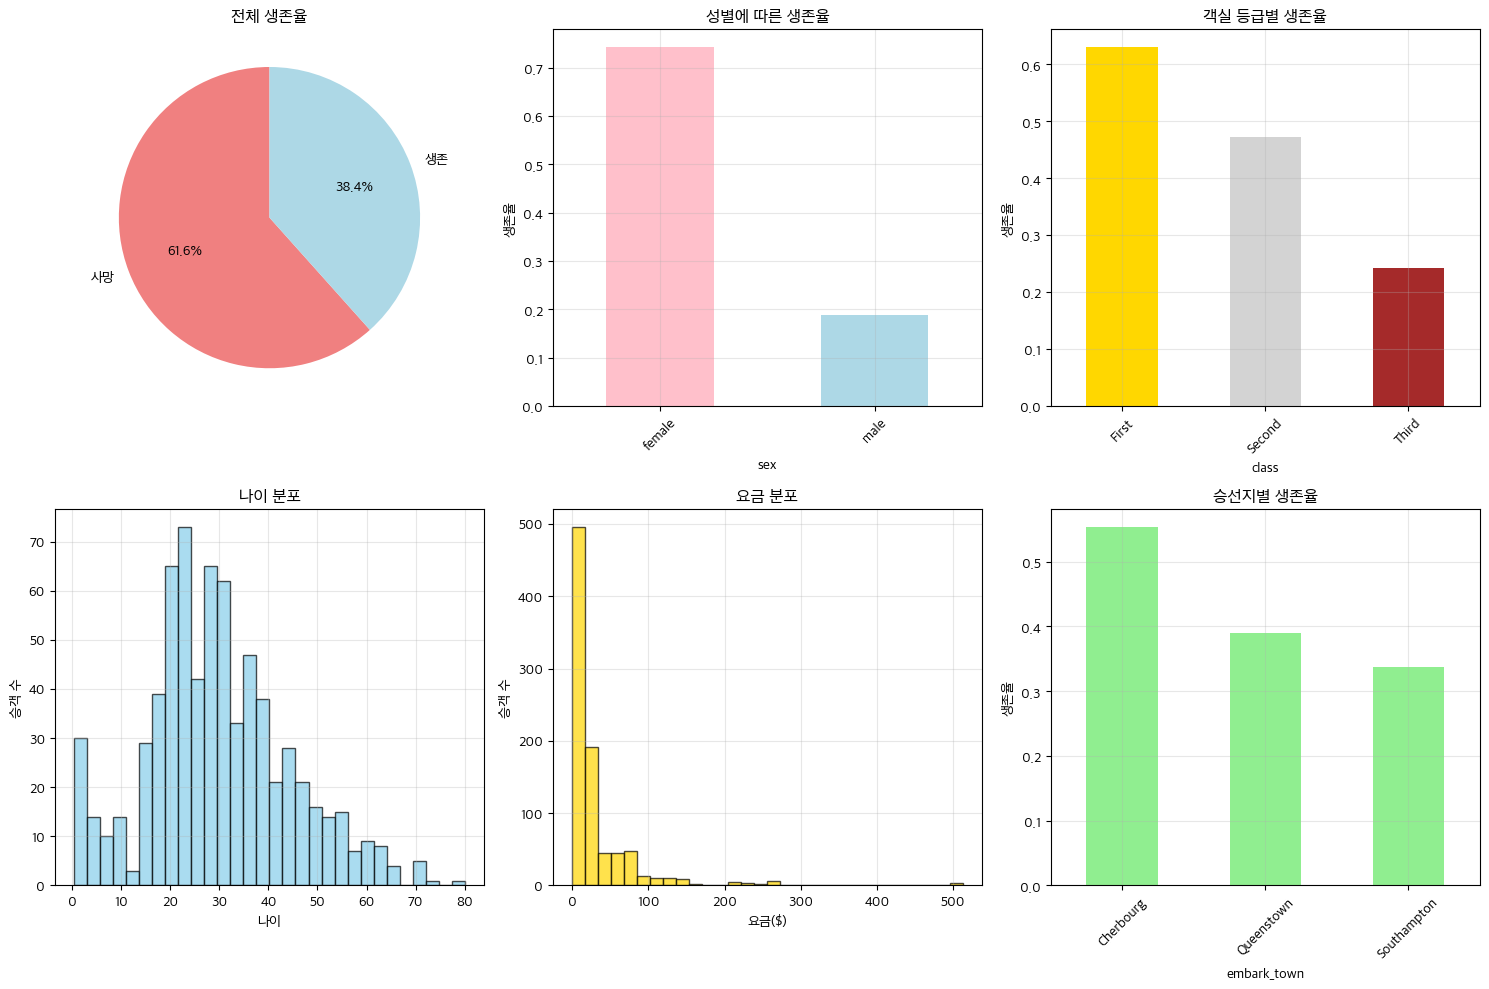

✅ 기본 시각화 완료!
📊 주요 패턴들:
👩 여성 생존율: 74.2%
👨 남성 생존율: 18.9%
🥇 1등석 생존율: 63.0%
🥉 3등석 생존율: 24.2%


In [4]:
# 📊 생존율 시각화 (한글 제목 버전)
plt.figure(figsize=(15, 10))
# 🎨 한글 폰트 재설정 (차트 그리기 전에 확실히!)
plt.rcParams['font.family'] = ['Apple SD Gothic Neo', 'Nanum Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False
# 1. 전체 생존율 (파이 차트)
plt.subplot(2, 3, 1)
survival_counts = titanic['survived'].value_counts()
plt.pie(survival_counts.values, labels=['사망', '생존'], autopct='%1.1f%%', 
        startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('전체 생존율')

# 2. 성별에 따른 생존율
plt.subplot(2, 3, 2)
sex_survival = titanic.groupby('sex')['survived'].mean()
sex_survival.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('성별에 따른 생존율')
plt.ylabel('생존율')
plt.xticks(rotation=45)

# 3. 객실 등급에 따른 생존율
plt.subplot(2, 3, 3)
class_survival = titanic.groupby('class')['survived'].mean()
class_survival.plot(kind='bar', color=['gold', 'lightgray', 'brown'])
plt.title('객실 등급별 생존율')
plt.ylabel('생존율')
plt.xticks(rotation=45)

# 4. 나이 분포
plt.subplot(2, 3, 4)
plt.hist(titanic['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('나이 분포')
plt.xlabel('나이')
plt.ylabel('승객 수')

# 5. 요금 분포
plt.subplot(2, 3, 5)
plt.hist(titanic['fare'].dropna(), bins=30, alpha=0.7, color='gold', edgecolor='black')
plt.title('요금 분포')
plt.xlabel('요금($)')
plt.ylabel('승객 수')

# 6. 승선지별 생존율
plt.subplot(2, 3, 6)
embark_survival = titanic.groupby('embark_town')['survived'].mean().dropna()
embark_survival.plot(kind='bar', color='lightgreen')
plt.title('승선지별 생존율')
plt.ylabel('생존율')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("✅ 기본 시각화 완료!")
print("📊 주요 패턴들:")
print(f"👩 여성 생존율: {titanic[titanic['sex']=='female']['survived'].mean()*100:.1f}%")
print(f"👨 남성 생존율: {titanic[titanic['sex']=='male']['survived'].mean()*100:.1f}%")
print(f"🥇 1등석 생존율: {titanic[titanic['class']=='First']['survived'].mean()*100:.1f}%")
print(f"🥉 3등석 생존율: {titanic[titanic['class']=='Third']['survived'].mean()*100:.1f}%")


## 🎭 Step 3: 심화 분석 - "타이타닉의 숨겨진 패턴"

**데이터에서 흥미로운 스토리를 찾아보자!** 🕵️‍♂️


성별 × 객실등급별 생존율:
class   First  Second  Third
sex                         
female  0.968   0.921  0.500
male    0.369   0.157  0.135


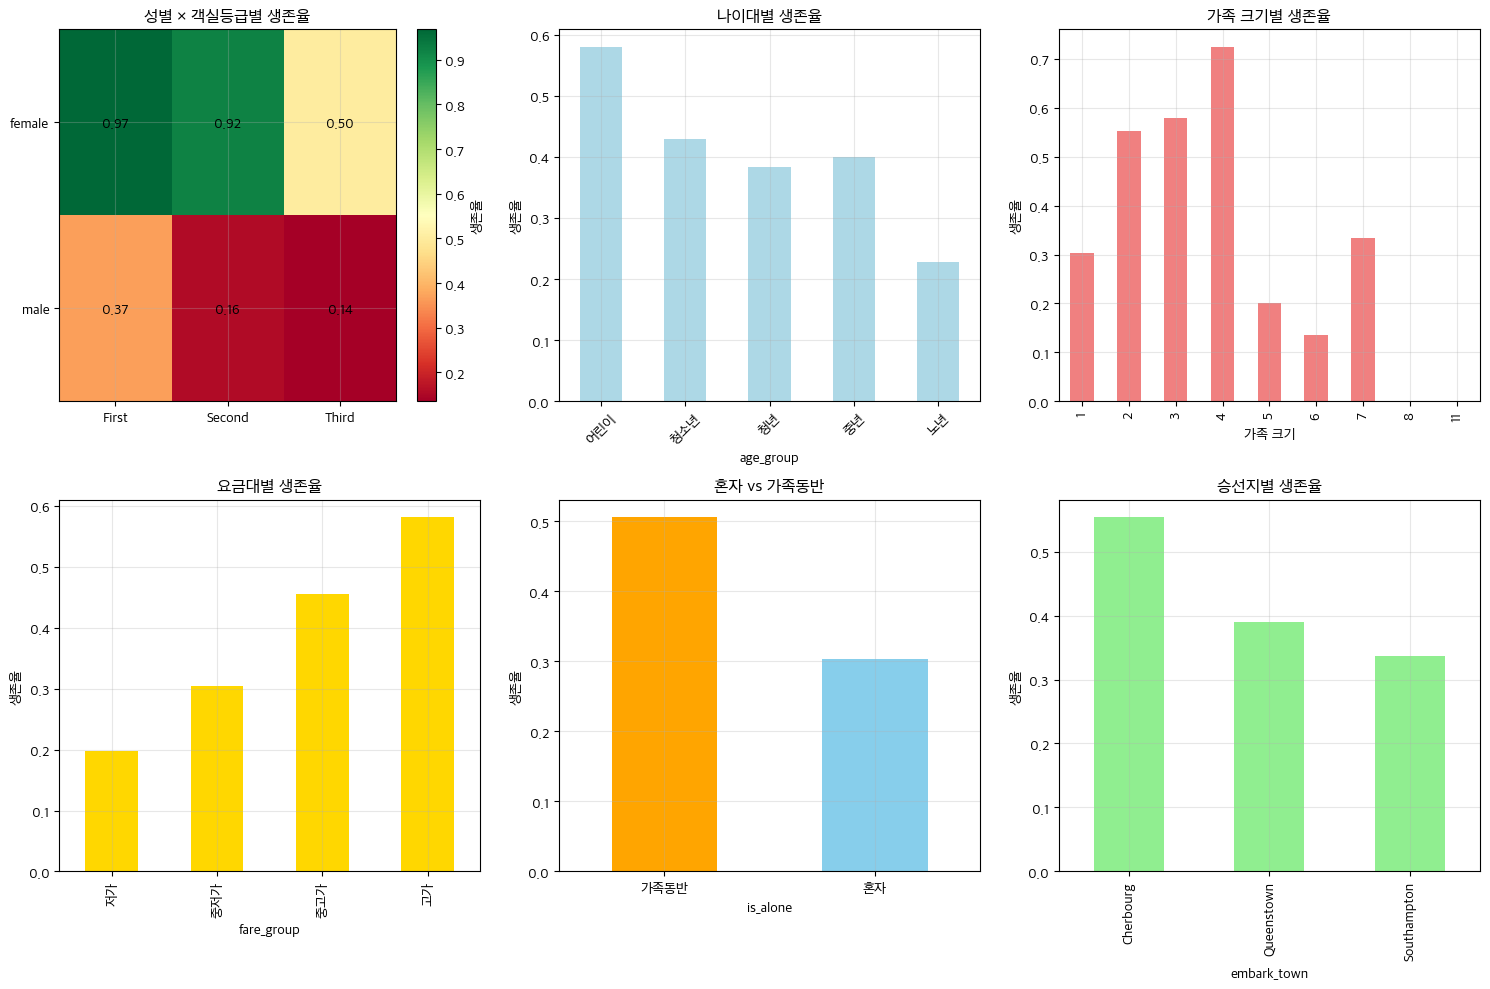


핵심 패턴 분석 결과:
👩 여성 생존율: 74.2%
👨 남성 생존율: 18.9%
🥇 1등석 생존율: 63.0%
🥉 3등석 생존율: 24.2%
👶 어린이 생존율: 57.4%
🚶‍♂️ 혼자 탄 승객 생존율: 30.4%
👨‍👩‍👧‍👦 가족과 함께 탄 승객 생존율: 50.6%


In [5]:
# 심화 분석: 히트맵과 차트 (05_evaluation_metrics 방식 사용)
# 🎨 한글 폰트 재설정 (차트 그리기 전에 확실히!)
plt.rcParams['font.family'] = ['Apple SD Gothic Neo', 'Nanum Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 10))

# 1. 성별 × 객실등급 히트맵 (가장 중요!)
plt.subplot(2, 3, 1)
survival_heatmap = titanic.pivot_table(values='survived', index='sex', columns='class', aggfunc='mean')
# 05번에서 사용한 방식: 판다스 DataFrame + 시각화
print("성별 × 객실등급별 생존율:")
print(survival_heatmap.round(3))

# matplotlib 히트맵 (05번 방식)
im = plt.imshow(survival_heatmap.values, cmap='RdYlGn', aspect='auto')
plt.xticks(range(len(survival_heatmap.columns)), survival_heatmap.columns)
plt.yticks(range(len(survival_heatmap.index)), survival_heatmap.index)
plt.title('성별 × 객실등급별 생존율')
plt.colorbar(im, label='생존율')

# 숫자 표시
for i in range(len(survival_heatmap.index)):
    for j in range(len(survival_heatmap.columns)):
        plt.text(j, i, f'{survival_heatmap.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontweight='bold')

# 2. 나이대별 생존율
plt.subplot(2, 3, 2)
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100],labels=['어린이', '청소년', '청년', '중년', '노년'])
age_survival = titanic.groupby('age_group')['survived'].mean()
age_survival.plot(kind='bar', color='lightblue')
plt.title('나이대별 생존율')
plt.ylabel('생존율')
plt.xticks(rotation=45)

# 3. 가족 크기별 생존율
plt.subplot(2, 3, 3)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
family_survival = titanic.groupby('family_size')['survived'].mean()
family_survival.plot(kind='bar', color='lightcoral')
plt.title('가족 크기별 생존율')
plt.xlabel('가족 크기')
plt.ylabel('생존율')

# 4. 요금 구간별 생존율
plt.subplot(2, 3, 4)
titanic['fare_group'] = pd.qcut(titanic['fare'], q=4, labels=['저가', '중저가', '중고가', '고가'])
fare_survival = titanic.groupby('fare_group')['survived'].mean()
fare_survival.plot(kind='bar', color='gold')
plt.title('요금대별 생존율')
plt.ylabel('생존율')

# 5. 혼자 vs 가족동반
plt.subplot(2, 3, 5)
titanic['is_alone'] = (titanic['family_size'] == 1)
alone_survival = titanic.groupby('is_alone')['survived'].mean()
alone_survival.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('혼자 vs 가족동반')
plt.xticks([0, 1], ['가족동반', '혼자'], rotation=0)
plt.ylabel('생존율')

# 6. 승선지별 생존율
plt.subplot(2, 3, 6)
embark_survival = titanic.groupby('embark_town')['survived'].mean()
embark_survival.plot(kind='bar', color='lightgreen')
plt.title('승선지별 생존율')
plt.ylabel('생존율')

plt.tight_layout()
plt.show()

# 핵심 인사이트 출력
print("\n핵심 패턴 분석 결과:")
print("="*50)
print(f"👩 여성 생존율: {titanic[titanic['sex']=='female']['survived'].mean()*100:.1f}%")
print(f"👨 남성 생존율: {titanic[titanic['sex']=='male']['survived'].mean()*100:.1f}%")
print(f"🥇 1등석 생존율: {titanic[titanic['class']=='First']['survived'].mean()*100:.1f}%")
print(f"🥉 3등석 생존율: {titanic[titanic['class']=='Third']['survived'].mean()*100:.1f}%")
print(f"👶 어린이 생존율: {titanic[titanic['age'] < 12]['survived'].mean()*100:.1f}%")
print(f"🚶‍♂️ 혼자 탄 승객 생존율: {titanic[titanic['is_alone']]['survived'].mean()*100:.1f}%")
print(f"👨‍👩‍👧‍👦 가족과 함께 탄 승객 생존율: {titanic[~titanic['is_alone']]['survived'].mean()*100:.1f}%")


## 🔧 Step 4: 데이터 전처리 - "AI가 이해할 수 있게 정리하기"

**"결측치를 채우고, 문자를 숫자로 바꿔서 AI 학습 준비!"** 🤖

### 🎯 **전처리 목표**
1. **결측치 처리**: 빈 데이터 채우기
2. **카테고리 인코딩**: 문자 → 숫자 변환
3. **불필요한 컬럼 제거**: AI에게 혼란 주는 데이터 정리
4. **데이터 검증**: 전처리가 제대로 되었는지 확인

---


In [6]:
# 🔧 1단계: 결측치 처리 전략 수립
print("🔍 현재 결측치 상황:")
print("="*50)

missing_info = titanic.isnull().sum()
missing_percent = (missing_info / len(titanic)) * 100

for col in missing_info[missing_info > 0].index:
    count = missing_info[col]
    percent = missing_percent[col]
    print(f"📊 {col}: {count}개 ({percent:.1f}%) 결측")
    
    # 처리 전략 제시
    if percent > 50:
        print(f"   🗑️  전략: 삭제 (결측치가 너무 많음)")
    elif percent > 10:
        print(f"   🔢 전략: 평균값/최빈값으로 채우기")
    else:
        print(f"   ✅ 전략: 최빈값으로 채우기 (문제없음)")
    print()

print("💡 전처리 계획:")
print("   age (19.9%) → 평균 나이로 채우기")
print("   embarked/embark_town (0.2%) → 최빈값으로 채우기") 
print("   deck (77.2%) → 컬럼 삭제 (너무 많이 비어있음)")
print("   불필요한 컬럼들 → 삭제")


🔍 현재 결측치 상황:
📊 age: 177개 (19.9%) 결측
   🔢 전략: 평균값/최빈값으로 채우기

📊 embarked: 2개 (0.2%) 결측
   ✅ 전략: 최빈값으로 채우기 (문제없음)

📊 deck: 688개 (77.2%) 결측
   🗑️  전략: 삭제 (결측치가 너무 많음)

📊 embark_town: 2개 (0.2%) 결측
   ✅ 전략: 최빈값으로 채우기 (문제없음)

📊 age_group: 177개 (19.9%) 결측
   🔢 전략: 평균값/최빈값으로 채우기

💡 전처리 계획:
   age (19.9%) → 평균 나이로 채우기
   embarked/embark_town (0.2%) → 최빈값으로 채우기
   deck (77.2%) → 컬럼 삭제 (너무 많이 비어있음)
   불필요한 컬럼들 → 삭제


In [7]:
# 🔧 2단계: 실제 결측치 처리
print("🛠️ 결측치 처리 시작!")
print("="*50)

# 원본 데이터 복사 (실수해도 되돌릴 수 있게)
titanic_clean = titanic.copy()

# 1. age 결측치 → 평균나이로 채우기 (올바른 방법)
age_mean = titanic_clean['age'].mean()
before_age = titanic_clean['age'].isnull().sum()
# inplace=True 대신 직접 할당 (더 안전)
titanic_clean['age'] = titanic_clean['age'].fillna(age_mean)
after_age = titanic_clean['age'].isnull().sum()

print(f"✅ age 결측치 처리:")
print(f"   처리 전: {before_age}개 → 처리 후: {after_age}개")
print(f"   평균 나이 {age_mean:.1f}세로 채움")

# 2. embarked 결측치 → 최빈값으로 채우기 (올바른 방법)
embarked_mode = titanic_clean['embarked'].mode()[0]  # 가장 많은 값
before_embarked = titanic_clean['embarked'].isnull().sum()
titanic_clean['embarked'] = titanic_clean['embarked'].fillna(embarked_mode)
after_embarked = titanic_clean['embarked'].isnull().sum()

print(f"\n✅ embarked 결측치 처리:")
print(f"   처리 전: {before_embarked}개 → 처리 후: {after_embarked}개")
print(f"   최빈값 '{embarked_mode}'로 채움")

# 3. embark_town도 같이 처리 (올바른 방법)
town_mode = titanic_clean['embark_town'].mode()[0]
titanic_clean['embark_town'] = titanic_clean['embark_town'].fillna(town_mode)

print(f"\n✅ embark_town도 '{town_mode}'로 채움")

# 4. 불필요한 컬럼들 삭제 (존재하는 컬럼만)
columns_to_drop = []
potential_drops = ['deck', 'who', 'adult_male', 'alive', 'alone']
for col in potential_drops:
    if col in titanic_clean.columns:
        columns_to_drop.append(col)

if columns_to_drop:
    titanic_clean = titanic_clean.drop(columns=columns_to_drop)
    print(f"\n🗑️ 불필요한 컬럼 삭제:")
    print(f"   삭제된 컬럼: {columns_to_drop}")
else:
    print(f"\n🗑️ 삭제할 불필요한 컬럼 없음")

print(f"   현재 컬럼 수: {len(titanic_clean.columns)}개")

# 최종 결측치 확인
final_missing = titanic_clean.isnull().sum().sum()
print(f"\n🎉 결측치 처리 완료!")
if final_missing == 0:
    print(f"   ✅ 전체 결측치: {final_missing}개 (완벽!)")
else:
    print(f"   ⚠️ 전체 결측치: {final_missing}개 (추가 처리 필요)")


🛠️ 결측치 처리 시작!
🔄 원본 데이터로 초기화: (891, 19)
⚠️ 예상치 못한 컬럼들 발견: ['age_group', 'family_size', 'fare_group', 'is_alone']
   → 피처 엔지니어링 단계에서 만들어야 하는 컬럼들
   ✅ 기본 컬럼들만 유지: (891, 15)
✅ age 결측치 처리:
   처리 전: 177개 → 처리 후: 0개
   평균 나이 29.7세로 채움

✅ embarked 결측치 처리:
   처리 전: 2개 → 처리 후: 0개
   최빈값 'S'로 채움

✅ embark_town도 'Southampton'로 채움

⚠️ deck 컬럼 분석:
   결측치: 688개 / 891개 (77.2%)
   → 너무 많은 결측치로 인해 삭제 예정

🗑️ 컬럼 삭제 작업:
   • deck: 결측치 77.2%로 삭제
   • who: 불필요한 컬럼으로 삭제
   • adult_male: 불필요한 컬럼으로 삭제
   • alive: 불필요한 컬럼으로 삭제
   • alone: 불필요한 컬럼으로 삭제
   ✅ 총 5개 컬럼 삭제됨

📊 정리 완료:
   현재 컬럼 수: 10개
   남은 컬럼: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'embark_town']

🎉 결측치 처리 완료!
   ✅ 전체 결측치: 0개 (완벽!)


In [8]:
# 🔧 3단계: 카테고리 인코딩 (문자 → 숫자 변환)
print("🔤 카테고리 인코딩 시작!")
print("="*50)

# AI는 문자를 못 읽어요! 숫자로 바꿔야 함
print("🤖 AI에게 설명:")
print("   'male' 이라는 글자를 못 읽어요!")
print("   대신 male=0, female=1 이렇게 숫자로 바꿔줘야 해요!")

print(f"\n📊 변환 전 데이터 타입들:")
categorical_columns = ['sex', 'embarked', 'class', 'embark_town']
for col in categorical_columns:
    unique_values = titanic_clean[col].unique()
    print(f"   {col}: {unique_values}")

# 1. sex: male/female → 0/1
print(f"\n✅ sex 인코딩:")
print(f"   변환 전: {titanic_clean['sex'].unique()}")
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})
print(f"   변환 후: {titanic_clean['sex'].unique()} (male=0, female=1)")

# 2. embarked: S/C/Q → 0/1/2  
print(f"\n✅ embarked 인코딩:")
print(f"   변환 전: {titanic_clean['embarked'].unique()}")
titanic_clean['embarked'] = titanic_clean['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(f"   변환 후: {titanic_clean['embarked'].unique()} (S=0, C=1, Q=2)")

# 3. class: First/Second/Third → 1/2/3
print(f"\n✅ class 인코딩:")
print(f"   변환 전: {titanic_clean['class'].unique()}")
titanic_clean['class'] = titanic_clean['class'].map({'First': 1, 'Second': 2, 'Third': 3})
print(f"   변환 후: {titanic_clean['class'].unique()} (First=1, Second=2, Third=3)")

# 4. embark_town은 embarked와 중복이니 삭제
titanic_clean = titanic_clean.drop(columns=['embark_town'])
print(f"\n🗑️ embark_town 삭제 (embarked와 중복)")

print(f"\n🎉 인코딩 완료!")
print(f"   모든 카테고리가 숫자로 변환됨!")
print(f"   AI가 이해할 수 있는 데이터 준비 완료! 🤖✨")


🔤 카테고리 인코딩 시작!
🤖 AI에게 설명:
   'male' 이라는 글자를 못 읽어요!
   대신 male=0, female=1 이렇게 숫자로 바꿔줘야 해요!

📊 변환 전 데이터 타입들:
   sex: ['male' 'female']
   embarked: ['S' 'C' 'Q']
   class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
   embark_town: ['Southampton' 'Cherbourg' 'Queenstown']

✅ sex 인코딩:
   변환 전: ['male' 'female']
   변환 후: [0 1] (male=0, female=1)

✅ embarked 인코딩:
   변환 전: ['S' 'C' 'Q']
   변환 후: [0 1 2] (S=0, C=1, Q=2)

✅ class 인코딩:
   변환 전: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
   변환 후: [3, 1, 2]
Categories (3, int64): [1, 2, 3] (First=1, Second=2, Third=3)

🗑️ embark_town 삭제 (embarked와 중복)

🎉 인코딩 완료!
   모든 카테고리가 숫자로 변환됨!
   AI가 이해할 수 있는 데이터 준비 완료! 🤖✨


In [9]:
# 🔧 4단계: 전처리 결과 검증
print("🔍 전처리 완료 후 데이터 검증!")
print("="*60)

# 1. 기본 정보 확인
print(f"📊 최종 데이터 크기: {titanic_clean.shape[0]}명의 승객, {titanic_clean.shape[1]}개의 특성")
# 실제 결측치 개수 확인
missing_count = titanic_clean.isnull().sum().sum()
if missing_count == 0:
    print(f"🎯 결측치 현황: {missing_count}개 (완전 제거! ✅)")
else:
    print(f"🎯 결측치 현황: {missing_count}개 (⚠️ 아직 남아있음)")
    print("   남은 결측치:")
    remaining_missing = titanic_clean.isnull().sum()
    for col in remaining_missing[remaining_missing > 0].index:
        print(f"      {col}: {remaining_missing[col]}개")

# 2. 컬럼 목록과 데이터 타입
print(f"\n📋 최종 컬럼 목록:")
for i, col in enumerate(titanic_clean.columns, 1):
    dtype = titanic_clean[col].dtype
    sample_values = titanic_clean[col].head(3).tolist()
    print(f"   {i}. {col} ({dtype}): {sample_values}...")

# 3. 전처리 전후 비교
print(f"\n📈 전처리 전후 비교:")
print(f"   🔸 처리 전: {titanic.shape[1]}개 컬럼, {titanic.isnull().sum().sum()}개 결측치")
print(f"   🔸 처리 후: {titanic_clean.shape[1]}개 컬럼, {titanic_clean.isnull().sum().sum()}개 결측치")

# 4. 데이터 타입 최적화 확인
numeric_columns = titanic_clean.select_dtypes(include=[np.number]).columns
print(f"\n🔢 숫자형 컬럼: {len(numeric_columns)}개")
print(f"   {list(numeric_columns)}")

# 5. 샘플 데이터 미리보기
print(f"\n👀 전처리된 데이터 미리보기:")
print("="*50)
print(titanic_clean.head())

print(f"\n✅ 데이터 전처리 완료!")
print(f"🎯 이제 AI 모델 학습 준비가 완료되었습니다!")
print(f"🚀 다음 단계: 피처 엔지니어링으로 고고!")


🔍 전처리 완료 후 데이터 검증!
📊 최종 데이터 크기: 891명의 승객, 9개의 특성
🎯 결측치 현황: 0개 (완전 제거! ✅)

📋 최종 컬럼 목록:
   1. survived (int64): [0, 1, 1]...
   2. pclass (int64): [3, 1, 3]...
   3. sex (int64): [0, 1, 1]...
   4. age (float64): [22.0, 38.0, 26.0]...
   5. sibsp (int64): [1, 1, 0]...
   6. parch (int64): [0, 0, 0]...
   7. fare (float64): [7.25, 71.2833, 7.925]...
   8. embarked (int64): [0, 1, 0]...
   9. class (category): [3, 1, 3]...

📈 전처리 전후 비교:
   🔸 처리 전: 19개 컬럼, 1046개 결측치
   🔸 처리 후: 9개 컬럼, 0개 결측치

🔢 숫자형 컬럼: 8개
   ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

👀 전처리된 데이터 미리보기:
   survived  pclass  sex   age  sibsp  parch     fare  embarked class
0         0       3    0  22.0      1      0   7.2500         0     3
1         1       1    1  38.0      1      0  71.2833         1     1
2         1       3    1  26.0      0      0   7.9250         0     3
3         1       1    1  35.0      1      0  53.1000         0     1
4         0       3    0  35.0      0      0   8.